(300, 448, 3)


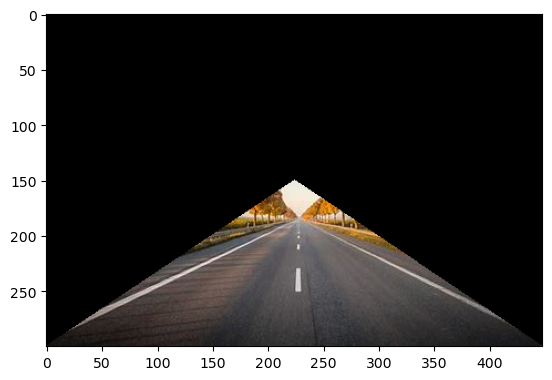

In [1]:
#import necessary libraries
#perform mask operation on the road image
import matplotlib.pylab as plt
import cv2
import numpy as np

image = cv2.imread(r"C:\Users\uppal\Downloads\road.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(image.shape)
height = image.shape[0]
width = image.shape[1]

region_of_interest_vertices = [
    (0, height),
    (width/2, height/2),
    (width, height)
]

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    channel_count = img.shape[2]
    match_mask_color = (255,) * channel_count
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

cropped_image = region_of_interest(image,
                np.array([region_of_interest_vertices], np.int32),)

plt.imshow(cropped_image)
plt.show()

(300, 448, 3)


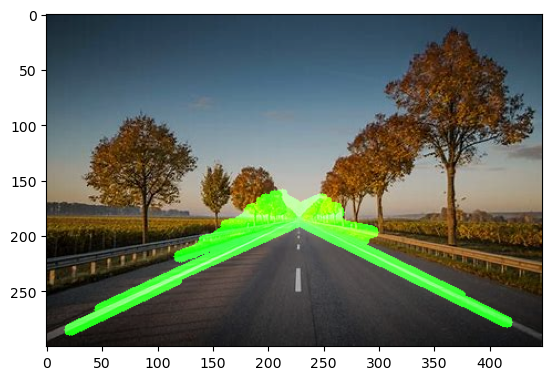

In [2]:
#detecting the road lane line
import matplotlib.pylab as plt
import cv2
import numpy as np

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def drow_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0, 255, 0), thickness=10)

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

image = cv2.imread(r"C:\Users\uppal\Downloads\road.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
height = image.shape[0]
width = image.shape[1]
region_of_interest_vertices = [
    (0, height),
    (width/2, height/2),
    (width, height)
]
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
canny_image = cv2.Canny(gray_image, 100, 200)
cropped_image = region_of_interest(canny_image,
                np.array([region_of_interest_vertices], np.int32),)
lines = cv2.HoughLinesP(cropped_image,
                        rho=6,
                        theta=np.pi/180,
                        threshold=160,
                        lines=np.array([]),
                        minLineLength=40,
                        maxLineGap=25)
image_with_lines = drow_the_lines(image, lines)
plt.imshow(image_with_lines)
plt.show()

In [1]:
#detecting road lane line on video
import matplotlib.pylab as plt
import cv2
import numpy as np

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def drow_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(blank_image, (x1, y1), (x2, y2), (0, 255, 0), thickness=10)

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

def process(image):
    print(image.shape)
    height = image.shape[0]
    width = image.shape[1]
    region_of_interest_vertices = [
        (0, height),
        (width / 2, height / 2),
        (width, height)
    ]
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    canny_image = cv2.Canny(gray_image, 100, 120)
    cropped_image = region_of_interest(canny_image, np.array([region_of_interest_vertices], np.int32),)
    lines = cv2.HoughLinesP(cropped_image,
                            rho=2,
                            theta=np.pi / 180,
                            threshold=50,
                            lines=np.array([]),
                            minLineLength=40,
                            maxLineGap=100)
    image_with_lines = drow_the_lines(image, lines)
    return image_with_lines

cap = cv2.VideoCapture(r"C:\Users\uppal\Downloads\road_car_view.mp4")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frame = process(frame)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280

In [1]:
import cv2
import numpy as np

def region_of_interest(frame):
    height, width = frame.shape[:2]
    mask = np.zeros_like(frame)
    
    # Define a polygon that roughly covers the road area
    polygon = np.array([[
        (int(0.1 * width), height),
        (int(0.9 * width), height),
        (int(0.6 * width), int(0.6 * height)),
        (int(0.4 * width), int(0.6 * height))
    ]], np.int32)
    
    cv2.fillPoly(mask, polygon, 255)
    roi = cv2.bitwise_and(frame, mask)
    return roi

def draw_lines(frame, lines):
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 5)

def process_lines(lines, frame_shape):
    left_lines = []
    right_lines = []
    middle_lines = []

    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                # Calculate slope
                slope = (y2 - y1) / (x2 - x1)
                # Categorize line based on slope
                if slope < -0.5:
                    left_lines.append(line)
                elif slope > 0.5:
                    right_lines.append(line)
                else:
                    middle_lines.append(line)

    return left_lines, right_lines, middle_lines

def draw_lane_lines(frame, lines, color=(0, 255, 0), thickness=5):
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(frame, (x1, y1), (x2, y2), color, thickness)

# Open video capture
video = cv2.VideoCapture(r"C:\Users\uppal\Downloads\road_car_view.mp4")

while True:
    ret, or_frame = video.read()
    if not ret:
        # Restart video if end is reached
        video = cv2.VideoCapture(r"C:\Users\uppal\Downloads\road_car_view.mp4")
        continue
    
    # Apply Gaussian blur to the frame
    frame = cv2.GaussianBlur(or_frame, (5, 5), 0)
    
    # Convert frame to HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # Define range for yellow color (lane color)
    lower_y = np.array([18, 94, 140])
    upper_y = np.array([48, 255, 255])
    
    # Create a mask with the specified yellow range
    mask = cv2.inRange(hsv, lower_y, upper_y)
    
    # Apply Canny edge detection
    edges = cv2.Canny(mask, 50, 150)
    
    # Define region of interest
    cropped_edges = region_of_interest(edges)
    
    # Apply Hough Line Transform to detect lines
    lines = cv2.HoughLinesP(cropped_edges, 1, np.pi / 180, 50, maxLineGap=50)
    
    # Process lines to separate left, right, and middle lines
    left_lines, right_lines, middle_lines = process_lines(lines, frame.shape)
    
    # Draw lane lines on the frame
    draw_lane_lines(frame, left_lines, color=(255, 0, 0), thickness=5)  # Left lanes in blue
    draw_lane_lines(frame, right_lines, color=(0, 0, 255), thickness=5)  # Right lanes in red
    draw_lane_lines(frame, middle_lines, color=(0, 255, 0), thickness=5)  # Middle lanes in green
    
    # Display the original frame with lane lines and the edges
    cv2.imshow("frame", frame)
    cv2.imshow("edges", edges)
    
    # Exit when 'q' key is pressed
    key = cv2.waitKey(25)
    if key == ord('q'):
        break

# Release video capture and close windows
video.release()
cv2.destroyAllWindows()


C:\Users\uppal\AppData\Local\Temp\ipykernel_6808\1054565179.py:35: RuntimeWarning: invalid value encountered in scalar divide
  slope = (y2 - y1) / (x2 - x1)
